In [0]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import rmsprop, Adam
from keras.utils import to_categorical

%matplotlib inline

In [0]:
import tensorflow as tf


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [140]:
print(keras.__version__)

2.2.5


In [0]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

0


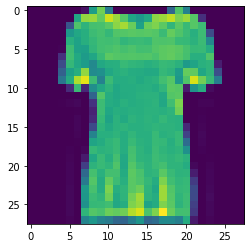

In [53]:
plt.imshow(train_X[10])
print(train_Y[10])

In [54]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [55]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

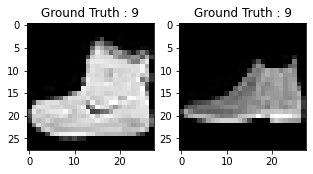

In [56]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [57]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255

In [59]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [61]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
import keras
import keras.models as models

In [113]:
train_X.shape[1:]

(28, 28, 1)

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28, 28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))


In [0]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))


In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [150]:
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 128)       

In [151]:
model_train=model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 83s 110ms/step - loss: 0.4606 - accuracy: 0.8324 - val_loss: 0.3260 - val_accuracy: 0.8839
Epoch 2/20
750/750 [==============================] - 82s 110ms/step - loss: 0.2875 - accuracy: 0.8948 - val_loss: 0.2890 - val_accuracy: 0.8928
Epoch 3/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2424 - accuracy: 0.9094 - val_loss: 0.2497 - val_accuracy: 0.9059
Epoch 4/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2122 - accuracy: 0.9214 - val_loss: 0.2382 - val_accuracy: 0.9141
Epoch 5/20
750/750 [==============================] - 82s 109ms/step - loss: 0.1865 - accuracy: 0.9304 - val_loss: 0.2281 - val_accuracy: 0.9172
Epoch 6/20
750/750 [==============================] - 82s 109ms/step - loss: 0.1656 - accuracy: 0.9382 - val_loss: 0.2358 - val_accuracy: 0.9132
Epoch 7/20
750/750 [==============================] - 82s 109ms/step - loss: 0.1429 - accuracy: 0.9478 - val_loss: 0.2329 - val_ac

In [152]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5056592226028442
Test accuracy: 0.9101999998092651


In [158]:
model_train.history

{'accuracy': [0.8324166536331177,
  0.8947708606719971,
  0.9093541502952576,
  0.9213958382606506,
  0.9304166436195374,
  0.9381874799728394,
  0.9477708339691162,
  0.9532708525657654,
  0.9593750238418579,
  0.9662500023841858,
  0.9703958630561829,
  0.9749791622161865,
  0.9787083268165588,
  0.9811458587646484,
  0.9835416674613953,
  0.9838125109672546,
  0.9864583611488342,
  0.9878749847412109,
  0.9880833625793457,
  0.9907083511352539],
 'loss': [0.4606304168701172,
  0.2875179350376129,
  0.2423619031906128,
  0.212214395403862,
  0.1864822953939438,
  0.16560302674770355,
  0.14289768040180206,
  0.12486620247364044,
  0.10721150785684586,
  0.09030687808990479,
  0.07784833014011383,
  0.06678559631109238,
  0.05675159767270088,
  0.05051602050662041,
  0.04380561783909798,
  0.042423974722623825,
  0.03573349863290787,
  0.03167789801955223,
  0.03354182466864586,
  0.025519954040646553],
 'val_accuracy': [0.8839166760444641,
  0.8927500247955322,
  0.905916690826416,
 

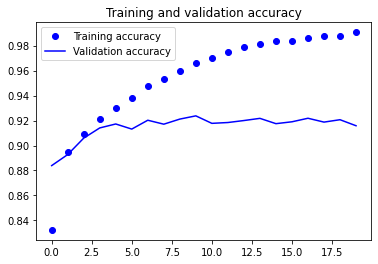

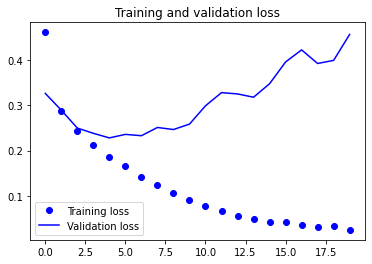

In [159]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
fashion_model = tf.keras.Sequential()
fashion_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D((2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.25))
fashion_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))                  
fashion_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(tf.keras.layers.Dropout(0.4))
fashion_model.add(tf.keras.layers.Flatten())
fashion_model.add(tf.keras.layers.Dense(128, activation='linear'))
fashion_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))           
fashion_model.add(tf.keras.layers.Dropout(0.3))
fashion_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [155]:
fashion_model.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)        

In [0]:
fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [162]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 87s 116ms/step - loss: 0.5944 - accuracy: 0.7798 - val_loss: 0.3929 - val_accuracy: 0.8518
Epoch 2/20
750/750 [==============================] - 87s 115ms/step - loss: 0.3750 - accuracy: 0.8645 - val_loss: 0.2999 - val_accuracy: 0.8890
Epoch 3/20
750/750 [==============================] - 86s 115ms/step - loss: 0.3299 - accuracy: 0.8783 - val_loss: 0.2889 - val_accuracy: 0.8917
Epoch 4/20
750/750 [==============================] - 87s 117ms/step - loss: 0.2991 - accuracy: 0.8892 - val_loss: 0.2616 - val_accuracy: 0.9033
Epoch 5/20
750/750 [==============================] - 86s 115ms/step - loss: 0.2794 - accuracy: 0.8961 - val_loss: 0.2409 - val_accuracy: 0.9113
Epoch 6/20
750/750 [==============================] - 86s 115ms/step - loss: 0.2671 - accuracy: 0.9011 - val_loss: 0.2381 - val_accuracy: 0.9137
Epoch 7/20
750/750 [==============================] - 86s 115ms/step - loss: 0.2575 - accuracy: 0.9052 - val_loss: 0.2432 - val_ac

In [163]:
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [164]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 [==============================] - 6s 18ms/step - loss: 0.2202 - accuracy: 0.9186


In [165]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22017642855644226
Test accuracy: 0.9186000227928162


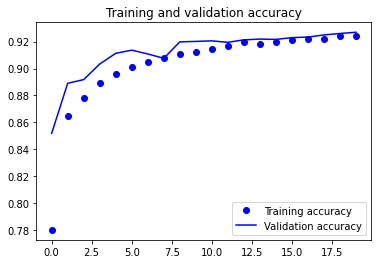

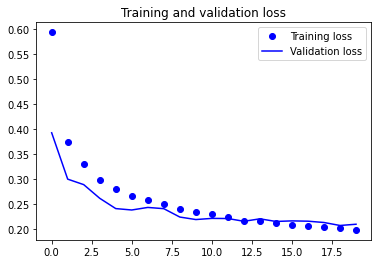

In [166]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted_classes = fashion_model.predict(test_X)


In [0]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


Found 9137 correct labels
ERROR! Session/line number was not unique in database. History logging moved to new session 63


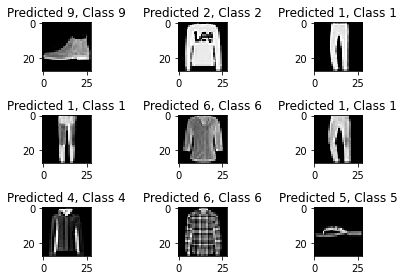

In [169]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 863 incorrect labels


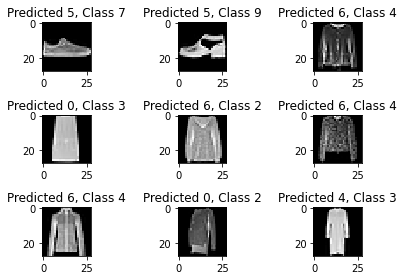

In [170]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [171]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.90      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.86      0.88      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.77      0.74      0.75      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

